# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [92]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [93]:
# Add Matplotlib inline command
%matplotlib inline

In [94]:
# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [95]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


## Deliverable 1: Get a Summary DataFrame 

### 1. Get the total rides for each city type

In [54]:
total_rides_bytype = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_bytype

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

### 2. Get the total drivers for each city type

In [55]:
total_drivers_bytype = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_bytype

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

###  3. Get the total amount of fares for each city type

In [56]:
total_fares_bytype = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_bytype

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

###  4. Get the average fare per ride for each city type. 

In [57]:
fare_avgride_bytype = total_fares_bytype / total_rides_bytype
fare_avgride_bytype

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

### 5. Get the average fare per driver for each city type. 

In [58]:
fare_avgdriver_bytype = total_fares_bytype / total_drivers_bytype
fare_avgdriver_bytype

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

### 6. Create a PyBer summary DataFrame. 

In [59]:
pyber_summary_df = pd.DataFrame({
                                 "Total rides": total_rides_bytype,
                                 "Total drivers": total_drivers_bytype,
                                 "Total amount of fares": total_fares_bytype,
                                 "Average of fare per ride": fare_avgride_bytype,
                                 "Average of fare per driver": fare_avgdriver_bytype
                                })
pyber_summary_df

,Total rides,Total drivers,Total amount of fares,Average of fare per ride,Average of fare per driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


###  7. Cleaning up the DataFrame. Delete the index name

In [25]:
pyber_summary_df.index.name = None

###  8. Format the columns.

In [60]:
pyber_summary_df["Total rides"] = pyber_summary_df["Total rides"].map('{:,.0f}'.format)
pyber_summary_df["Total drivers"] = pyber_summary_df["Total drivers"].map("{:,.0f}".format)
pyber_summary_df["Total amount of fares"] = pyber_summary_df["Total amount of fares"].map("${:,.2f}".format)
pyber_summary_df["Average of fare per ride"] = pyber_summary_df["Average of fare per ride"].map("${:,.2f}".format)
pyber_summary_df["Average of fare per driver"] = pyber_summary_df["Average of fare per driver"].map("${:,.2f}".format)
pyber_summary_df

,Total rides,Total drivers,Total amount of fares,Average of fare per ride,Average of fare per driver
type,,,,,
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

### 1. Read the merged DataFrame

In [85]:
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


### 2. Using groupby() to create a new DataFrame showing the sum of the fares for each date where the indices are the city type and date.

#### pivot method
4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' to get the total fares for each type of city by the date.

In [97]:
# fares_fordate_bytype = pyber_data_df.groupby(["date"]).sum()["fare"]
fares_fordate_bytype = pyber_data_df.pivot(index="date",columns="type",values="fare")
fares_fordate_bytype

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


#### 3 frames: long method

In [86]:
# For urban
urban_df = pyber_data_df[pyber_data_df.type == "Urban"]
urban_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
1620,Reynoldsfurt,2019-02-14 11:25:10,39.40,9070692324754,67,Urban
1621,Christopherfurt,2019-03-13 01:47:52,32.05,2788817929605,41,Urban
1622,Raymondhaven,2019-03-20 02:20:34,38.53,8658255136559,11,Urban
1623,Port Johnbury,2019-03-26 07:22:45,7.63,8089282605778,3,Urban


In [87]:
# For suburban
suburban_df = pyber_data_df[pyber_data_df.type == "Suburban"]
urban_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
1620,Reynoldsfurt,2019-02-14 11:25:10,39.40,9070692324754,67,Urban
1621,Christopherfurt,2019-03-13 01:47:52,32.05,2788817929605,41,Urban
1622,Raymondhaven,2019-03-20 02:20:34,38.53,8658255136559,11,Urban
1623,Port Johnbury,2019-03-26 07:22:45,7.63,8089282605778,3,Urban


In [88]:
# For rural
rural_df = pyber_data_df[pyber_data_df.type == "Rural"]
rural_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [111]:
# For urban
urban_total_fares_bydate = urban_df.groupby(["date"]).sum()["fare"]
# For suburban
suburban_total_fares_bydate = suburban_df.groupby(["date"]).sum()["fare"]
# For rural
rural_total_fares_bydate = rural_df.groupby(["date"]).sum()["fare"]

# Total dataframe
total_fares_bydate = pd.DataFrame({
                        "Urban": urban_total_fares_bydate,
                        "Suburban": suburban_total_fares_bydate,
                        "Rural": rural_total_fares_bydate    
})
total_fares_bydate.head(10)

,Urban,Suburban,Rural
date,,,
2019-01-01 00:08:16,37.91,NaN,NaN
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,7.57,NaN,NaN
2019-01-01 05:23:21,10.75,NaN,NaN
2019-01-01 09:45:36,NaN,NaN,43.69
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,5.42,NaN,NaN
2019-01-01 14:42:25,12.31,NaN,NaN


In [112]:
fares_fordate_bytype.dtypes

type
date         object
Rural       float64
Suburban    float64
Urban       float64
dtype: object

#### total_fares_bydate = fares_fordate_bytype

### 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.

In [99]:
# df = df.reset_index()
fares_fordate_bytype = fares_fordate_bytype.reset_index(level=None, col_level=1)
fares_fordate_bytype

type,date,Rural,Suburban,Urban
0,2019-01-01 00:08:16,NaN,NaN,37.91
1,2019-01-01 00:46:46,NaN,47.74,NaN
2,2019-01-01 02:07:24,NaN,24.07,NaN
3,2019-01-01 03:46:50,NaN,NaN,7.57
4,2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...,...
2370,2019-05-08 04:20:00,NaN,NaN,21.99
2371,2019-05-08 04:39:49,NaN,NaN,18.45
2372,2019-05-08 07:29:01,NaN,NaN,18.55
2373,2019-05-08 11:38:35,NaN,NaN,19.77


In [105]:
# pd.to_datetime(df['time']).dt.date
fares_fordate_bytype["date"] = pd.to_datetime(fares_fordate_bytype["date"]).dt.date
fares_fordate_bytype

type,date,Rural,Suburban,Urban
0,2019-01-01,NaN,NaN,37.91
1,2019-01-01,NaN,47.74,NaN
2,2019-01-01,NaN,24.07,NaN
3,2019-01-01,NaN,NaN,7.57
4,2019-01-01,NaN,NaN,10.75
...,...,...,...,...
2370,2019-05-08,NaN,NaN,21.99
2371,2019-05-08,NaN,NaN,18.45
2372,2019-05-08,NaN,NaN,18.55
2373,2019-05-08,NaN,NaN,19.77


In [120]:
fares_fordate_bytype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2375 non-null   datetime64[ns]
 1   Rural     125 non-null    float64       
 2   Suburban  625 non-null    float64       
 3   Urban     1625 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 74.3 KB


### 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.

In [119]:
# I change the object type of "date" for datetime already, in order to use .loc[] method in Step 5.
fares_fordate_bytype["date"] = pd.to_datetime(fares_fordate_bytype["date"])

### 7. Check that the datatype for the index is datetime using df.info()

In [121]:
fares_fordate_bytype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2375 non-null   datetime64[ns]
 1   Rural     125 non-null    float64       
 2   Suburban  625 non-null    float64       
 3   Urban     1625 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 74.3 KB


### 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates
'2019-01-01':'2019-04-29'.

In [157]:
# First set_index to use loc
fares_fordate_bytype.set_index(["date"])
# fares_fordate_bytype

# Then use loc for a new dataframe
# extract_fares_df = [for x in fares_fordate_bytype.loc[]]
# pd.date_range(start='1/1/2018', end='1/08/2018')

dates_to_newdf = (pd.to_datetime(fares_fordate_bytype["date"]) > '2019-01-01') & (pd.to_datetime(fares_fordate_bytype["date"]) < '2019-04-29')
# dates_to_newdf

extract_fares_df = pd.DataFrame(fares_fordate_bytype.loc[dates_to_newdf])
extract_fares_df

type,date,Rural,Suburban,Urban
12,2019-01-02,NaN,44.71,NaN
13,2019-01-02,NaN,NaN,43.72
14,2019-01-02,NaN,NaN,37.34
15,2019-01-02,NaN,49.95,NaN
16,2019-01-02,NaN,NaN,34.79
...,...,...,...,...
2191,2019-04-28,NaN,NaN,11.46
2192,2019-04-28,NaN,NaN,36.42
2193,2019-04-28,NaN,NaN,31.43
2194,2019-04-28,NaN,34.87,NaN


In [158]:
extract_fares_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2184 entries, 12 to 2195
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2184 non-null   datetime64[ns]
 1   Rural     113 non-null    float64       
 2   Suburban  569 non-null    float64       
 3   Urban     1502 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 85.3 KB


### 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

In [159]:
extract_fares_df = extract_fares_df.set_index(["date"])

In [160]:
extract_fares_df.index = pd.to_datetime(extract_fares_df.index)
extract_fares_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2184 entries, 2019-01-02 to 2019-04-28
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     113 non-null    float64
 1   Suburban  569 non-null    float64
 2   Urban     1502 non-null   float64
dtypes: float64(3)
memory usage: 68.2 KB


In [161]:
extract_fares_df = extract_fares_df.resample("W").sum()
extract_fares_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,144.23,593.08,1533.90
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


### 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

<function matplotlib.pyplot.show(close=None, block=None)>

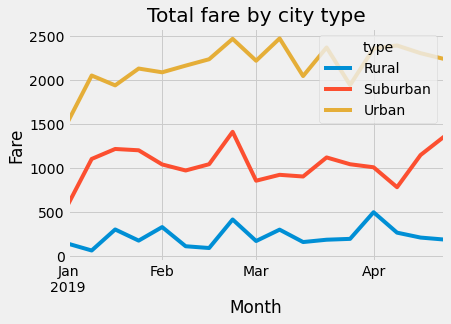

In [180]:
extract_fares_df.plot()
plt.title("Total fare by city type")
plt.xlabel("Month")
plt.ylabel("Fare")
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

plt.savefig("Total fare by city type.png")
plt.show

<Figure size 432x288 with 0 Axes>